# Lending Club Neural Netowrk
***

In [2]:
import numpy as np
import pandas as pd
import pickle

# Adjust Pandas DF View Options
pd.options.display.max_rows = 500
pd.options.display.max_columns = 500
# prevent the columns from trucating values when displaying the tables
pd.set_option('display.max_colwidth', -1)

In [2]:
lc = pickle.load(open('C:/Users/Steven Glover/Dropbox/802 - Final Paper/lc_current.p','rb'))
lc = lc.dropna(axis=1)

In [3]:
lc.loan_status.value_counts()

Current        788119
Fully Paid     589193
Charged Off    157646
Name: loan_status, dtype: int64

## Determine categorical & Continuous Variables

In [4]:
lc.shape

(1534958, 93)

In [5]:
categorical = []
for col in lc.columns.tolist():
    try:
        lc[col].astype(float)
    except:
        categorical.append(col)
        
continuous = [x for x in lc.columns.tolist() if x not in categorical]

## Clean Incorrectly Classified Categorical & Continuous Variables

In [7]:
# get continuous variables that should be categorical
print(categorical)
# remove dates from categorical

not_continuous = ['id', 'sec_app_flag','sec_app_fico_best']
dates = ['issue_d','last_pymnt_d','next_pymnt_d', 'last_credit_pull_d','earliest_cr_line']

# Remove dates from categorical listing
categorical = [x for x in categorical if x not in dates]

# remove categorical from continuos listing
continuous = [x for x in continuous if x not in not_continuous]

# add categorical variables misclassified as continuous
categorical.extend(not_continuous)

['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_credit_pull_d', 'application_type', 'disbursement_method', 'debt_settlement_flag', 'mths_since_recent_bc_cat', 'mo_sin_old_il_acct_cat', 'mths_since_recent_inq_cat', 'mths_since_last_delinq_cat', 'mths_since_rcnt_il_cat', 'mths_since_recent_revol_delinq_cat', 'mths_since_last_major_derog_cat', 'mths_since_recent_bc_dlq_cat', 'mths_since_last_record_cat']


In [8]:
print('Categorical Variables:')
print(categorical)
print('---------------\n')
print('Continuous Variables')
print(continuous)

Categorical Variables:
['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'zip_code', 'addr_state', 'initial_list_status', 'application_type', 'disbursement_method', 'debt_settlement_flag', 'mths_since_recent_bc_cat', 'mo_sin_old_il_acct_cat', 'mths_since_recent_inq_cat', 'mths_since_last_delinq_cat', 'mths_since_rcnt_il_cat', 'mths_since_recent_revol_delinq_cat', 'mths_since_last_major_derog_cat', 'mths_since_recent_bc_dlq_cat', 'mths_since_last_record_cat', 'id', 'sec_app_flag', 'sec_app_fico_best']
---------------

Continuous Variables
['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt

## find categorical variables with excessive number of categories

In [9]:
for cat in categorical:
    print(cat ,' : ', lc[cat].nunique())

term  :  2
grade  :  7
sub_grade  :  35
home_ownership  :  6
verification_status  :  3
loan_status  :  3
purpose  :  14
zip_code  :  948
addr_state  :  51
initial_list_status  :  2
application_type  :  2
disbursement_method  :  2
debt_settlement_flag  :  2
mths_since_recent_bc_cat  :  3
mo_sin_old_il_acct_cat  :  4
mths_since_recent_inq_cat  :  4
mths_since_last_delinq_cat  :  4
mths_since_rcnt_il_cat  :  3
mths_since_recent_revol_delinq_cat  :  4
mths_since_last_major_derog_cat  :  4
mths_since_recent_bc_dlq_cat  :  4
mths_since_last_record_cat  :  4
id  :  1534958
sec_app_flag  :  2
sec_app_fico_best  :  2


In [10]:
remove_cat = ['id','title','emp_title','zip_code', 'loan_status']
# Remove categories with an excessive number of unique categories from the categorical listing
categorical = [x for x in categorical if x not in remove_cat]

In [11]:
lc = lc[continuous+categorical+['loan_status']]
lc.shape

(1534958, 88)

## Create the test - train split:
First you will break the data into “train” and “predict” where train contains Fully Paid and Charged Off categories, while Predict contains only Current category. You will then create an ANN classifying loan status using the Train dataset. 

In [12]:
pre_train  = lc.loc[lc.loan_status.isin(['Charged Off','Fully Paid']),:]
test = lc.loc[~lc.loan_status.isin(['Charged Off','Fully Paid']),:]

In [15]:
path = 'D:/Analytics/Spring Semester/Machine Learning/Lending Club/Pickles/'
pickle.dump(lc,open(path + 'lc_clean.p','wb'))
pickle.dump(categorical,open(path + 'categorical.p','wb'))
pickle.dump(continuous,open(path + 'continuous.p','wb'))

# <font color = red> Import Pickles </font>

In [3]:
import numpy as np
import pandas as pd
import pickle

# Import Pickles
path = 'D:/Analytics/Spring Semester/Machine Learning/Lending Club/Pickles/'
lc = pickle.load(open(path + 'lc_clean.p','rb'))
categorical = pickle.load(open(path + 'categorical.p','rb'))
continuous = pickle.load(open(path + 'continuous.p','rb'))
# create division of pretrain and test
pre_train  = lc.loc[lc.loan_status.isin(['Charged Off','Fully Paid']),:]
test = lc.loc[~lc.loan_status.isin(['Charged Off','Fully Paid']),:]

**Shuffle pre-train** 

In [4]:
from sklearn.utils import shuffle
pre_train = shuffle(pre_train)

In [32]:
def data_type_preprocessing(df,y, var_type = 'continuous',
                            continuous_list = None, categorical_list = None, categorical_only= False, seed = 1):
    
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.preprocessing import StandardScaler
    from sklearn.cross_validation import train_test_split
    ''' The following function will preprocess the data and create a train test split.
    It will be able to handle dataframes that are all categorical, all continuous, or mixed.
    it will create dummies for categorical variables. It will normalize continous variables.
    it will also create a train test split. For mixed dataframes it will return the indexes of 
    the continuous and categorical variables.
    
    var_type
    --------
    var_type = 'continuous' (by default. Indicates only continous variables in the dataframe)
    var_type = 'categorical' ('Indicates only a categorical dataframe)
    var_type = 'Mixed ('Indicates both categorical and continous variables present. 
                        Requires both categorical list, and continuous lists.)
    '''
    
    #get variable names from the function
    #------------------------------------
    
    #get the y col
    y_col = y
    
    #create the y array 
    y = np.array(df[y].astype(str))
    
    """ Determine the type variables we are working with and 
    process accrodingly"""
    
    if var_type == 'mixed':
        #get categorical & continuous variables
        cont = continuous_list
        cat = categorical_list
        
        #subset continuous
        cont_df = df[cont]
        
        #get the length of continuous and categorical to slice arrays
        split_position = len(cont)
        
        #get dummies for categorical variables
        cat_df = pd.get_dummies(df[cat].astype(str))
    
        #recreate the dataframe with dummies
        X = pd.merge(cont_df,cat_df, how = 'left', left_index=True, right_index = True)
        
    elif var_type == 'categorical':
        #create a dataframe of dummy variables that do not include y
        X = pd.get_dummies(df[[col for col in df.columns if col not in y_col]])
        
    elif var_type == 'continuous':
        X = df[continuous_list]
    
    
    # Get column names
    col_names = X.columns
    X = np.array(X)
    
    # Create the train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = seed)
    
    
    #preprocess continuous variables
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
        
    if var_type == 'mixed':
        #idenify the array index of categorical and continuous columns
        cont_idx = [i for i in range(split_position)]
        cat_idx = [i for i in range(split_position, col_names.shape[0])] 
        return X_train, X_test, y_train, y_test, col_names
    else:
        return X_train, X_test, y_train, y_test, col_names

In [72]:
X_train, X_validate, y_train, y_validate, col_names = data_type_preprocessing(pre_train,
                                                                      y = 'loan_status', 
                                                                      var_type = 'mixed',
                                                                      continuous_list = continuous,
                                                                      categorical_list = categorical,
                                                                      seed = 5)

In [7]:
X_train_df = pd.DataFrame(X_train, columns = col_names)
X_train_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,earliest_cr_line_months,average_fico,annual_inc_final,dti_final,term_ 36 months,term_ 60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,disbursement_method_Cash,disbursement_method_DirectPay,debt_settlement_flag_N,debt_settlement_flag_Y,mths_since_recent_bc_cat_50+,mths_since_recent_bc_cat_<50,mths_since_recent_bc_cat_Not Reported,mo_sin_old_il_acct_cat_0-150,mo_sin_old_il_acct_cat_150-200,mo_sin_old_il_acct_cat_200+,mo_sin_old_il_acct_cat_Not Reported,mths_since_recent_inq_cat_0-5,mths_since_recent_inq_cat_15+,mths_since_recent_inq_cat_5-15,mths_since_recent_inq_cat_Not Reported,mths_since_last_delinq_cat_0-50,mths_since_last_delinq_cat_50-75,mths_since_last_delinq_cat_75+,mths_since_last_delinq_cat_Not Reported,mths_since_rcnt_il_cat_50+,mths_since_rcnt_il_cat_<50,mths_since_rcnt_il_cat_Not Reported,mths_since_recent_revol_delinq_cat_0-50,mths_since_recent_revol_delinq_cat_50-75,mths_since_recent_revol_delinq_cat_75+,mths_since_recent_revol_delinq_cat_Not Reported,mths_since_last_major_derog_cat_0-50,mths_since_last_major_derog_cat_50-75,mths_since_last_major_derog_cat_75+,mths_since_last_major_derog_cat_Not Reported,mths_since_recent_bc_dlq_cat_0-50,mths_since_recent_bc_dlq_cat_50-75,mths_since_recent_bc_dlq_cat_75+,mths_since_recent_bc_dlq_cat_Not Reported,mths_since_last_record_cat_0-40,mths_

In [8]:
# ensure the response has been elimiated from the training variables
[print(i) for i in col_names if 'loan_status' in i]

[]

In [9]:
print(X_train.shape)
print(X_validate.shape)

(672155, 229)
(74684, 229)


# Neural Network Architecture

In [10]:
from keras.layers import Dense
from keras.models import Sequential
from keras import regularizers
from keras.layers import Dropout
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

Using TensorFlow backend.


In [11]:
# Label Encode the response
le =LabelEncoder()
y_train = le.fit_transform(y_train)
y_validate = le.fit_transform(y_validate)

# THIS ENCODING IS NEEDED FOR THE NN
y_train = to_categorical(le.fit_transform(y_train))
y_validate = to_categorical(le.fit_transform(y_validate))

In [12]:
def NN_overfit_plt(model, plt_param = 'loss'):
    """
    The following function will create a plot comparing training and validation
    for a neural network. It will plot either the accuracy or the loss as indicated
    in by the plt_param argument. 
    
    """
    if plt_param == 'loss':
        trn = 'loss'
        val = 'val_loss'
    else:
        trn = 'acc'
        val = 'val_acc'
    
    # Get Training and Validation Loss
    training = model.history[trn]
    validation = model.history[val]
    
    # Determine the number of epochs
    epochs = range(1, len(training) + 1)
    
    # create the plot
    plt.plot(epochs, training, 'bo', label='Training '+ plt_param)
    plt.plot(epochs, validation, 'b', label='Validation '+ plt_param)
    plt.title('Training and validation '+ plt_param)
    plt.xlabel('Epochs')
    plt.ylabel(plt_param)
    plt.legend()
    
def validation_plots(model):
    plt.subplots(figsize=(10,4))
    plt.subplot(1, 2, 1)
    NN_overfit_plt(model, plt_param = 'loss')
    plt.subplot(1, 2, 2)
    NN_overfit_plt(model, plt_param = 'acc')
    plt.tight_layout()
    plt.show()

# Create Model Builder Builder to iterate over
https://keras.io/layers/advanced-activations/

In [13]:
def iter_ANN(inputs = 229,
             alphas = [.000,.000],
             layer_activation = 'relu',
             nodes = 4,
             do = [True, .5],
             num_layers = 2,
             output_activation = 'softmax',
             optimizer = 'adam',
             loss = 'categorical_crossentropy',
             metrics = ['acc']):
             epochs = 5
             batch_size = 512
            
    # Set up Sequential ANN and Input Layer
    model = Sequential()
    model.add(Dense(nodes, activation = layer_activation, input_shape=(inputs,)))
    
    # Create Hidden Layers
    for i in range(num_layers):
        model.add(Dense(nodes, kernel_regularizer=regularizers.l1_l2(l1 = alphas[0], l2 = alphas[1]),
                               activation = layer_activation))
        if do[0] == True:
            model.add(Dropout(do[1]))

    
    # Set Up Output Layer 
    model.add(Dense(2, activation = output_activation))
    
    model.compile(optimizer = optimizer,
                           loss = loss,
                           metrics=['acc'])
    return model

### Initial Modeling Effort :  A Shallow Simple Network
***
Neural networks have an adapt ability to identify interactions between variables, which eliminates the need to engineer predictors from the set of independent variables. Additionally, the iterative way neural networks learn from the data makes them best suited for large data sets and are often referred as "data hungry" algorithms. With these thoughts in mind, I began iterative process of building the neural network classifier by feeding the entire dataset to a shallow network consisting of layers with 4 nodes in each layer to see how it would perform. Since the model was very simple, I did not use any regularization or drop out. 

In [14]:
model = iter_ANN()
model_hist = model.fit(X_train, 
                       y_train,
                       epochs=5,
                       batch_size = 512,
                       validation_data=(X_validate, y_validate))

Train on 672155 samples, validate on 74684 samples
Epoch 1/5
672155/672155 [==============================] - 5s 7us/step - loss: 0.3761 - acc: 0.7887 - val_loss: 0.1657 - val_acc: 0.7886
Epoch 2/5
672155/672155 [==============================] - 4s 6us/step - loss: 0.2885 - acc: 0.8076 - val_loss: 0.1508 - val_acc: 0.9930
Epoch 3/5
672155/672155 [==============================] - 4s 6us/step - loss: 0.2855 - acc: 0.8097 - val_loss: 0.1465 - val_acc: 0.9942
Epoch 4/5
672155/672155 [==============================] - 4s 6us/step - loss: 0.2843 - acc: 0.8096 - val_loss: 0.1449 - val_acc: 0.9954
Epoch 5/5
672155/672155 [==============================] - 4s 6us/step - loss: 0.2825 - acc: 0.8109 - val_loss: 0.1449 - val_acc: 0.9954


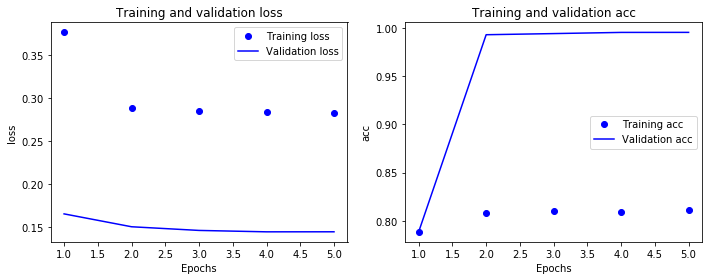

In [15]:
validation_plots(model_hist)

# Review of Complete Separation
***

In [16]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score, mean_squared_error
from sklearn.linear_model import LogisticRegressionCV

In [17]:
def accuaracy_report(y_test, predictions):
    from sklearn.metrics import classification_report, confusion_matrix
    print('The Accuracy Score is: ',np.array(np.sum(np.equal(predictions, y_test))) / y_test.shape[0],'\n')
    print('The Classification Report')
    print('-------------------------')
    print(classification_report(y_test, predictions),'\n')
    print('The Confusion Matrix')
    print('-------------------------')
    print(pd.DataFrame(confusion_matrix(y_test, predictions)).apply(lambda x: x / sum(x), axis=1))

## Decision Tree

In [18]:
X_train, X_validate, y_train, y_validate, col_names = data_type_preprocessing(pre_train,
                                                                      y = 'loan_status', 
                                                                      var_type = 'mixed',
                                                                      continuous_list = continuous,
                                                                      categorical_list = categorical)
y_train = le.fit_transform(y_train)
y_validate = le.fit_transform(y_validate)

clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
preds = clf.predict(X_validate)
accuaracy_report(y_validate, preds)

The Accuracy Score is:  0.998553907129 

The Classification Report
-------------------------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     15791
          1       1.00      1.00      1.00     58893

avg / total       1.00      1.00      1.00     74684
 

The Confusion Matrix
-------------------------
          0         1
0  0.996137  0.003863
1  0.000798  0.999202


### Variable Importance by Order

In [19]:
importance_df = pd.DataFrame({'Features': col_names, 'Importance': clf.feature_importances_})
importance_df.sort_values(by = 'Importance', ascending = False).reset_index(drop = True)
display(importance_df.head(10))

,Features,Importance
0,loan_amnt,0.039456
1,funded_amnt,0.020631
2,funded_amnt_inv,0.019170
3,int_rate,0.000116
4,installment,0.000376
5,annual_inc,0.000043
6,dti,0.000039
7,delinq_2yrs,0.000019
8,fico_range_low,0.000040
9,fico_range_high,0.000022


# Using Logistic Regression To Identify The Complete Separation Patterns
***
I will use logistic regression to identify the source of complete separation. I will use the l1 penalty in an attempt to drive the variables that are not impactful to zero. I will create a data frame of the variables, their beta values, and the definition of the variable. I will sort the data frame by the absolute value of the beta to try and determine the variables that are having the most influence on the complete separation predictions. I then sliced the training data df by the variables identified to inspect patterns in the data. The iteratively went through this process until I identified the sources of the complete separation. I identified the following:
1. There are fields that record the total payment amounts received. If this is higher than the amount loaned then the it is a charge off. 
    * [loan_amnt, funded_amnt, funded_amnt_inv] - this fields are equivalent or highly correlated. I will keep loan amount.
    * [total_pymnt, total_pymnt_inv, total_rec_prncp] - this fields are equivalent or highly correlated. 
    * total_rec_int
2. There are fields that are directly linked with charge offs, such as collection and recovery.
    * 'recoveries'
    * 'collection_recovery_fee'
3. Typically, a charge-offs last payment amount will be equal to the installment. I will remove the last payment amount to eliminate the interaction.
    * 'last_pymnt_amnt'
    * 'installment'
4. The last_fico ranges are typically much lower than the charge offs. In the 500s

In [20]:
path = 'D:/Analytics/Spring Semester/Machine Learning/Lending Club/'
# get definitions of the variables
defs = pd.read_csv(path + 'Lending Club Data Dictionary Approved.csv',
                  encoding = 'latin1')

In [21]:
# This listing identifies the columns that have previously been identified to cause complete separation

# drop columns that have complete separation
drop = ['funded_amnt', 'funded_amnt_inv','total_pymnt','total_pymnt_inv', 'total_rec_prncp',\
        'recoveries','collection_recovery_fee','installment','last_fico_range_low',\
        'total_rec_int','out_prncp', 'out_prncp_inv', 'debt_settlement_flag']

continuous = [x for x in continuous if x not in drop]
categorical = [x for x in categorical if x not in drop]

# Truncate the training data
pre_train = pre_train.iloc[:50000,:]
# train test split
X_train, X_validate, y_train, y_validate, col_names = data_type_preprocessing(pre_train,
                                                                      y = 'loan_status', 
                                                                      var_type = 'mixed',
                                                                      continuous_list = continuous,
                                                                      categorical_list = categorical)
# transfor the y
le =LabelEncoder()
y_train = le.fit_transform(y_train)
y_validate = le.fit_transform(y_validate)

# Logistic Regression CV
log = LogisticRegressionCV(Cs = 5, penalty='l1', solver = 'saga')
log.fit(X_train,y_train)

# Generate Predictions and determine the betas 
preds = log.predict(X_validate)
accuaracy_report(y_validate, preds)
betas = pd.DataFrame({'Features':col_names, 'Var_Betas':np.abs(log.coef_[0])})
betas = betas.sort_values(by= 'Var_Betas', ascending = False).reset_index(drop = True)
betas = betas.merge(defs, how = 'left', on = 'Features')
betas

C:\Users\Steven Glover\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


The Accuracy Score is:  0.9514 

The Classification Report
-------------------------
             precision    recall  f1-score   support

          0       0.90      0.88      0.89      1096
          1       0.97      0.97      0.97      3904

avg / total       0.95      0.95      0.95      5000
 

The Confusion Matrix
-------------------------
          0         1
0  0.879562  0.120438
1  0.028432  0.971568


,Features,Var_Betas,Description
0,last_pymnt_amnt,50.540843,Last total payment amount received
1,last_fico_range_high,28.014882,The upper boundary range the borrowers last FICO pulled belongs to.
2,int_rate,9.260062,Interest Rate on the loan
3,dti,7.213756,"A ratio calculated using the borrowers total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrowers self-reported monthly income."
4,total_il_high_credit_limit,4.780260,Total installment high credit/credit limit
5,acc_now_delinq,4.636467,The number of accounts on which the borrower is now delinquent.
6,num_tl_30dpd,4.442541,Number of accounts currently 30 days past due (updated in past 2 months)
7,sec_app_fico_best_0,4.178584,NaN
8,total_bal_ex_mort,3.986570,Total credit balance excluding mortgage
9,loan_amnt,3.567065,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."


In [37]:
pre_train[betas.iloc[:4,0].tolist()+['loan_status']]

,last_pymnt_amnt,last_fico_range_high,int_rate,total_rec_late_fee,loan_status
1327011,514.40,519.0,9.75,0.000000,Charged Off
119885,7717.66,759.0,8.39,0.000000,Fully Paid
30898,24957.70,744.0,12.39,0.000000,Fully Paid
498160,301.00,679.0,19.19,0.000000,Charged Off
67471,319.05,504.0,12.99,0.000000,Charged Off
58759,6499.35,689.0,18.24,0.000000,Fully Paid
66577,22205.22,714.0,13.35,0.000000,Fully Paid
678843,8877.58,809.0,6.49,0.000000,Fully Paid
37889,624.70,694.0,13.35,0.000000,Fully Paid
37230,373.30,664.0,8.39,0.000000,Fully Paid


## Subset the Features and Rerun the NN
In the last exercise I found several interaction that were causing complete separation. I will keep the variables needed to make accurate predictions while eliminating the complete separation. We need the loan balance in the model. It is too much of an important part of the loan make up to loose. The distance between the loan amount and the amount that has been paid is a very strong predictor. So I kept the loan amount, removed the variables that are strongly correlated with the loan amount, and removed the total amount paid. 
<br>
<br>
Also,There are 3 categories in the training variables that exist in the test set but not in the testing. I need to remove these from the training prior to creating the dummy variables.
<br>
<br>
['home_ownership_OTHER', 'purpose_educational', 'addr_state_IA']

In [66]:
# get the pretrain
pre_train  = lc.loc[lc.loan_status.isin(['Charged Off','Fully Paid']),:]

# exclude the categories that exists in the training but dont exists in the test set
pre_train = pre_train[pre_train.addr_state != 'IA']
pre_train = pre_train[pre_train.home_ownership != 'OTHER']
pre_train = pre_train[pre_train.purpose != 'educational']

# 'last_pymnt_amnt'
#,'last_fico_range_high'

# out_prncp, out_prncp_inv
# drop columns that have complete separation
drop = ['funded_amnt', 'funded_amnt_inv','total_pymnt','total_pymnt_inv', 'total_rec_prncp',\
        'total_rec_int','recoveries','collection_recovery_fee','installment','last_fico_range_low',\
        'out_prncp', 'out_prncp_inv', 'debt_settlement_flag']

# get continuous variables
continuous = [x for x in lc.columns.tolist() if x not in categorical]
not_continuous = ['id', 'sec_app_flag','sec_app_fico_best','loan_status']

# Remove not continuous and drop from the continuous listing
continuous = [x for x in continuous if x not in drop and x not in not_continuous]
categorical = [x for x in categorical if x not in drop]


X_train, X_validate, y_train, y_validate, col_names = data_type_preprocessing(pre_train,
                                                                      y = 'loan_status', 
                                                                      var_type = 'mixed',
                                                                      continuous_list = continuous,
                                                                      categorical_list = categorical,
                                                                      seed =5)
# Label Encode the response
le =LabelEncoder()
y_train = le.fit_transform(y_train)
y_validate = le.fit_transform(y_validate)

# THIS ENCODING IS NEEDED FOR THE NN
y_train = to_categorical(le.fit_transform(y_train))
y_validate = to_categorical(le.fit_transform(y_validate))

In [61]:
pd.Series(zero_hot_encode(y_validate)).value_counts(normalize = True)

1.0    0.789475
0.0    0.210525
dtype: float64

In [67]:
# Using Class Weights to Compensate for the imbalance of classes while training
class_weight_dict = {0:2.,1:1.}

#Build a shallow model for prediction
model = iter_ANN(inputs = 212,
             alphas = [.000, .000],
             layer_activation = 'relu',
             nodes = 16,
             do = [True,.5],
             num_layers = 2,
             output_activation = 'sigmoid',
             optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['acc'])

model_hist = model.fit(X_train, 
                       y_train,
                       epochs=10,
                       batch_size = 512,
                       validation_data=(X_validate, y_validate),
                       class_weight = class_weight_dict)           # show how this performs with and without the class weights

Train on 672111 samples, validate on 74680 samples
Epoch 1/10
672111/672111 [==============================] - 5s 8us/step - loss: 0.4109 - acc: 0.8804 - val_loss: 0.1389 - val_acc: 0.9467
Epoch 2/10
672111/672111 [==============================] - 5s 7us/step - loss: 0.2196 - acc: 0.9427 - val_loss: 0.1244 - val_acc: 0.9525
Epoch 3/10
672111/672111 [==============================] - 5s 7us/step - loss: 0.2081 - acc: 0.9432 - val_loss: 0.1214 - val_acc: 0.9532
Epoch 4/10
672111/672111 [==============================] - 5s 7us/step - loss: 0.2062 - acc: 0.9433 - val_loss: 0.1254 - val_acc: 0.9503
Epoch 5/10
672111/672111 [==============================] - 4s 7us/step - loss: 0.2015 - acc: 0.9421 - val_loss: 0.1270 - val_acc: 0.9485
Epoch 6/10
672111/672111 [==============================] - 5s 7us/step - loss: 0.2011 - acc: 0.9417 - val_loss: 0.1190 - val_acc: 0.9530
Epoch 7/10
672111/672111 [==============================] - 5s 7us/step - loss: 0.1993 - acc: 0.9425 - val_loss: 0.1291 -

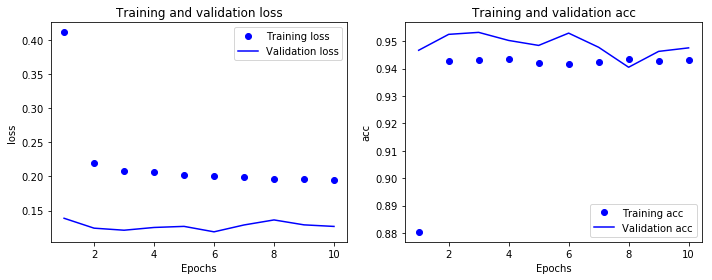

In [69]:
validation_plots(model_hist)

<br><br>
# Classification Report for the Neural Network
Before we can use the classification report function I need to convert the one hot encoded response array to a 1D array. The following function will achieve that. 

In [25]:
def zero_hot_encode(y_array):
    """
    This function will reverse a one hot encoded array
    """
    return_array = np.zeros(y_array.shape[0])
    for i in range(y_array.shape[0]):
        return_array[i]= np.argmax(y_array[i])
    return return_array

The following code will confirm the function works

In [36]:
print(y_validate)
zero_hot_encode(y_validate)

[[ 1.  0.]
 [ 0.  1.]
 [ 0.  1.]
 ..., 
 [ 0.  1.]
 [ 0.  1.]
 [ 1.  0.]]


array([ 0.,  1.,  1., ...,  1.,  1.,  0.])

### The Classification Report:
***

In [70]:
y_validate_encode = zero_hot_encode(y_validate)
preds = model.predict_classes(X_validate)
accuaracy_report(y_validate_encode, preds)

The Accuracy Score is:  0.947576325656 

The Classification Report
-------------------------
             precision    recall  f1-score   support

        0.0       0.82      0.96      0.88     15745
        1.0       0.99      0.95      0.97     58935

avg / total       0.95      0.95      0.95     74680
 

The Confusion Matrix
-------------------------
          0         1
0  0.955097  0.044903
1  0.054433  0.945567


# Preprocess the Test Set to Make Predictions

In [28]:
from sklearn.preprocessing import MinMaxScaler
test = lc.loc[~lc.loan_status.isin(['Charged Off','Fully Paid']),:]

# drop columns that have complete separation
drop = ['funded_amnt', 'funded_amnt_inv','total_pymnt','total_pymnt_inv', 'total_rec_prncp',\
        'total_rec_int','recoveries','collection_recovery_fee','installment','last_fico_range_low',\
        'out_prncp', 'out_prncp_inv', 'debt_settlement_flag']

# drop columns and separate the y
y_test = np.array(test.loan_status)
test = test.loc[:,~test.columns.isin(drop+['loan_status'])]

#subset continuous and normalize
cont_df = test[continuous]

#get dummies for categorical variables
cat_df = pd.get_dummies(test[categorical].astype(str))

#recreate the dataframe with dummies
X_test = pd.merge(cont_df,cat_df, how = 'left', left_index=True, right_index = True)
X_test_cols = X_test.columns.tolist()

scaler = MinMaxScaler()
X_test = scaler.fit_transform(np.array(X_test))

del test
del cont_df
del cat_df

Training proportions

In [30]:
pre_train.loan_status.value_counts(normalize = True)

Fully Paid     0.788914
Charged Off    0.211086
Name: loan_status, dtype: float64

# Predict using Testing Data

In [71]:
preds = model.predict_classes(X_test)
pd.Series(preds).value_counts(normalize = True)

1    0.780767
0    0.219233
dtype: float64

# Explore the Different Hyper Parameters

In [130]:
model_dict = {}

l1 = [0, .001,.0025,.005, .025,.03, .04, .05]
l2 = [0, 0, 0, 0, 0, 0, 0, 0]
DO = [0, 0, 0, 0, 0, 0, 0, 0]

for i, value in enumerate(l1):
    model = iter_ANN(inputs = 212,
             alphas = [value, 0],
             layer_activation = 'relu',
             nodes = 16,
             do = [False,.5],
             num_layers = 2,
             output_activation = 'sigmoid',
             optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['acc'])
    
    print('Model, L1 = ',value)
    model_dict['model' + str(i)] = model.fit(X_train, 
                                             y_train,
                                             epochs=10,
                                             batch_size = 512,
                                             validation_data=(X_validate, y_validate))
    print('\n\n')

Model, L1 =  0
Train on 672111 samples, validate on 74680 samples
Epoch 1/10
672111/672111 [==============================] - 8s 11us/step - loss: 0.2087 - acc: 0.9151 - val_loss: 0.1203 - val_acc: 0.9516
Epoch 2/10
672111/672111 [==============================] - 5s 8us/step - loss: 0.1178 - acc: 0.9533 - val_loss: 0.1152 - val_acc: 0.9538
Epoch 3/10
672111/672111 [==============================] - 6s 8us/step - loss: 0.1162 - acc: 0.9537 - val_loss: 0.1144 - val_acc: 0.9535
Epoch 4/10
672111/672111 [==============================] - 6s 8us/step - loss: 0.1142 - acc: 0.9545 - val_loss: 0.1137 - val_acc: 0.9547
Epoch 5/10
672111/672111 [==============================] - 6s 9us/step - loss: 0.1131 - acc: 0.9548 - val_loss: 0.1212 - val_acc: 0.9521
Epoch 6/10
672111/672111 [==============================] - 6s 8us/step - loss: 0.1123 - acc: 0.9551 - val_loss: 0.1121 - val_acc: 0.9552
Epoch 7/10
672111/672111 [==============================] - 6s 8us/step - loss: 0.1117 - acc: 0.9553 - va

## Create a table of the metrics for each generated ANN

In [131]:
for i, key in enumerate(model_dict.keys()):
    l1_val =  l1[i]
    l2_val =  l2[i]
    do_val =  DO[i]
    
    #  Validation Accuracy
    min_val = min(model_dict[key].history['val_acc'])
    max_val = max(model_dict[key].history['val_acc'])
    
    dif = max_val - min_val
    high_epoch = np.argmax(np.array(model_dict[key].history['val_acc']))

    if i == 0:
        vals = np.array([[l1_val, l2_val, do_val,min_val, max_val, dif, high_epoch]])
    else:
        vals = np.vstack((vals,np.array([[l1_val, l2_val, do_val,min_val, max_val, dif, high_epoch]])))
    
cols = ['l1', 'l2','DO','MIN_ACC','MAX_ACC','DIFF','HIGH_EPOCH']
nn_metrics = pd.DataFrame(vals, columns = cols)
nn_metrics

,l1,l2,DO,MIN_ACC,MAX_ACC,DIFF,HIGH_EPOCH
0,0.0000,0.0,0.0,0.951620,0.956066,0.004446,9.0
1,0.0010,0.0,0.0,0.952310,0.956052,0.003743,9.0
2,0.0025,0.0,0.0,0.952015,0.954888,0.002872,8.0
3,0.0050,0.0,0.0,0.951252,0.955122,0.003870,4.0
4,0.0250,0.0,0.0,0.788109,0.954734,0.166624,7.0
5,0.0300,0.0,0.0,0.821713,0.955256,0.133543,8.0
6,0.0400,0.0,0.0,0.788109,0.788109,0.000000,0.0
7,0.0500,0.0,0.0,0.788109,0.788109,0.000000,0.0


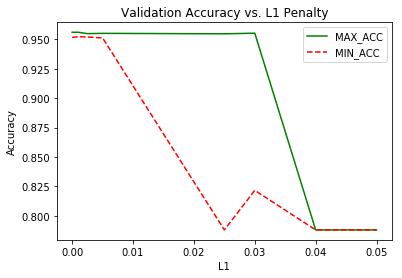

None
---------------------------------------------------------------------------------------------


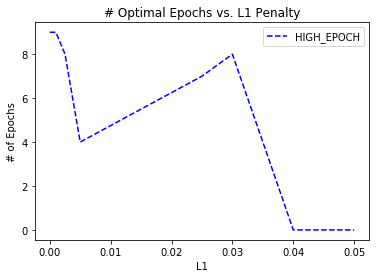

None
---------------------------------------------------------------------------------------------
Model, L1 =  0


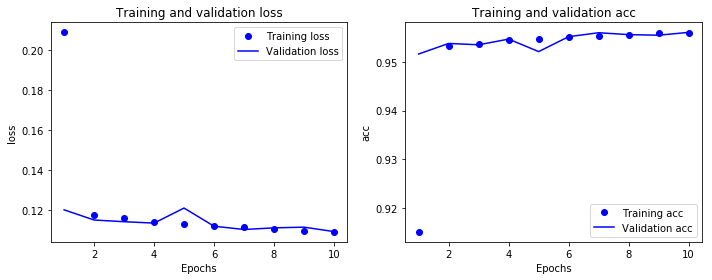

None
---------------------------------------------------------------------------------------------
Model, L1 =  0.001


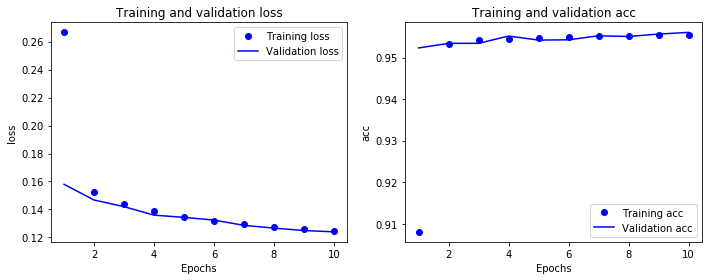

None
---------------------------------------------------------------------------------------------
Model, L1 =  0.0025


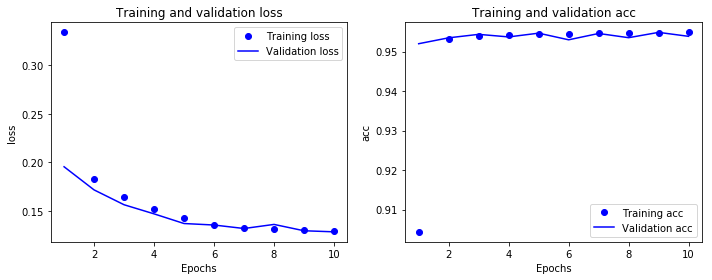

None
---------------------------------------------------------------------------------------------
Model, L1 =  0.005


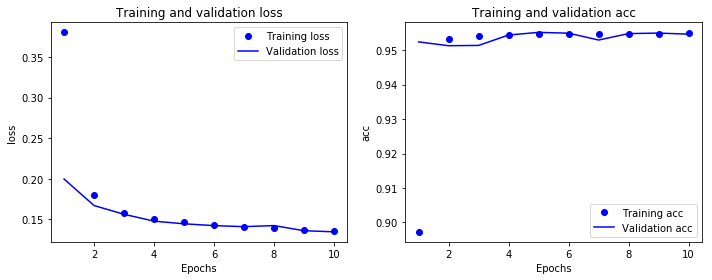

None
---------------------------------------------------------------------------------------------
Model, L1 =  0.025


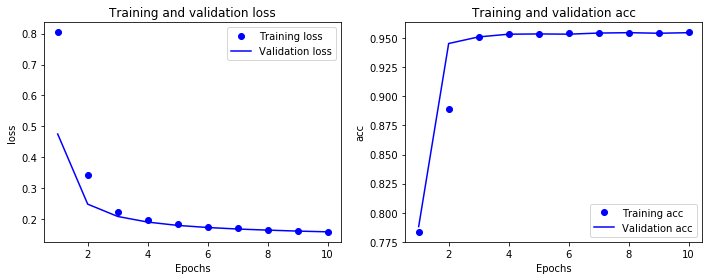

None
---------------------------------------------------------------------------------------------
Model, L1 =  0.03


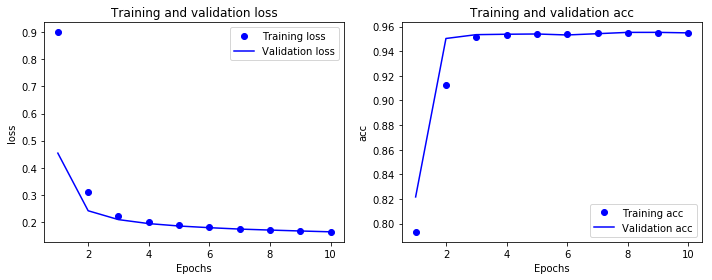

None
---------------------------------------------------------------------------------------------
Model, L1 =  0.04


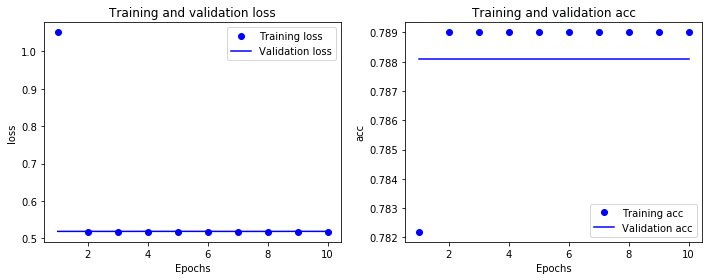

None
---------------------------------------------------------------------------------------------
Model, L1 =  0.05


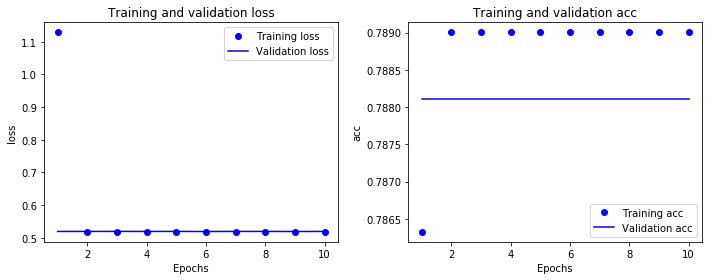

None


In [132]:
from matplotlib import pyplot as plt
# Validation Accuracy vs. L1 Rate
plt.plot(nn_metrics.l1, nn_metrics.MAX_ACC, 'b',color = 'green')
plt.plot(nn_metrics.l1, nn_metrics.MIN_ACC, linestyle ='dashed', color = 'red')
plt.title('Validation Accuracy vs. L1 Penalty')
plt.xlabel('L1')
plt.ylabel('Accuracy')
plt.legend()
print(plt.show())

print('---------------------------------------------------------------------------------------------')
# Max Epoch 
plt.plot(nn_metrics.l1, nn_metrics.HIGH_EPOCH, linestyle ='dashed', color = 'blue')
plt.title('# Optimal Epochs vs. L1 Penalty')
plt.xlabel('L1')
plt.ylabel('# of Epochs')
plt.legend()
print(plt.show())

# Training Vs. Validation Activity
for i, key in enumerate(model_dict.keys()):
    print('---------------------------------------------------------------------------------------------')
    print('Model, L1 = ',l1[i])
    print(validation_plots(model_dict[key]))
    

# Test
I chose model 1 with 2 epochs as the optimal model. Discuss why!!!

In [134]:
model = iter_ANN(inputs = 212,
         alphas = [0, 0],
         layer_activation = 'relu',
         nodes = 16,
         do = [False,.5],
         num_layers = 2,
         output_activation = 'sigmoid',
         optimizer = 'adam',
         loss = 'binary_crossentropy',
         metrics = ['acc'])

print('Model, L1 = ',value)
model_hist = model.fit(X_train, 
                       y_train,
                       epochs=2,
                       batch_size = 512,
                       validation_data=(X_validate, y_validate))

Model, L1 =  0.05
Train on 672111 samples, validate on 74680 samples
Epoch 1/2
672111/672111 [==============================] - 10s 15us/step - loss: 0.2364 - acc: 0.9014 - val_loss: 0.1230 - val_acc: 0.9530
Epoch 2/2
672111/672111 [==============================] - 6s 9us/step - loss: 0.1185 - acc: 0.9534 - val_loss: 0.1264 - val_acc: 0.9479


## Structure Testing Subset

In [45]:
from sklearn.preprocessing import MinMaxScaler
test = lc.loc[~lc.loan_status.isin(['Charged Off','Fully Paid']),:]

# drop columns that have complete separation
drop = ['funded_amnt', 'funded_amnt_inv','total_pymnt','total_pymnt_inv', 'total_rec_prncp',\
        'total_rec_int','recoveries','collection_recovery_fee','installment','last_fico_range_low',\
        'out_prncp', 'out_prncp_inv', 'debt_settlement_flag']

# drop columns and separate the y
y_test = np.array(test.loan_status)
test = test.loc[:,~test.columns.isin(drop+['loan_status'])]

#subset continuous and normalize
cont_df = test[continuous]

#get dummies for categorical variables
cat_df = pd.get_dummies(test[categorical].astype(str))

#recreate the dataframe with dummies
X_test = pd.merge(cont_df,cat_df, how = 'left', left_index=True, right_index = True)
X_test_cols = X_test.columns.tolist()

scaler = MinMaxScaler()
X_test = scaler.fit_transform(np.array(X_test))

del test
del cont_df
del cat_df

In [51]:
# make sure columns match
len([x for x in col_names if x not in X_test_cols])
[x for x in col_names if x not in X_test_cols]

['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'recoveries',
 'collection_recovery_fee',
 'last_fico_range_low',
 'home_ownership_OTHER',
 'purpose_educational',
 'addr_state_IA',
 'debt_settlement_flag_N',
 'debt_settlement_flag_Y']

In [47]:
preds = model.predict_classes(X_test)

ValueError: Error when checking : expected dense_16_input to have shape (229,) but got array with shape (212,)

In [138]:
pd.Series(preds).value_counts(normalize = True)

1    0.938997
0    0.061003
dtype: float64

In [146]:
pd.Series(y_validate_encode).value_counts(normalize = True)

1.0    0.788109
0.0    0.211891
dtype: float64

# Review the proportions of fully paid  and charged off loans by year

In [8]:
lc2 = pickle.load(open('C:/Users/Steven Glover/Dropbox/802 - Final Paper/lc_current.p','rb'))

res_dist_year = lc2[['loan_status','last_pymnt_d']]
del lc2

# Convert to Date Time
res_dist_year.last_pymnt_d = pd.to_datetime(res_dist_year.last_pymnt_d)

# Isololate the Year
res_dist_year['year'] = res_dist_year.last_pymnt_d.dt.year

# Remove Current Loans from the mix
res_dist_year = res_dist_year[res_dist_year.loan_status != 'Current']

#identify the proportions
for yr in res_dist_year.year.sort_values().unique().tolist():
    print(yr)
    print(res_dist_year.loc[res_dist_year.year == yr,'loan_status'].value_counts(normalize = True))
    print('\n-----------------------------')